# Anyonic models

We solve the almost-bosonic anyon model of https://arxiv.org/pdf/1901.10739.pdf

Iter     Function value   Gradient norm 
     0     8.236571e+01     1.544103e+01
 * time: 0.0029370784759521484
     1     6.322458e+01     9.744196e+00
 * time: 0.009190082550048828
     2     5.748033e+01     1.318191e+01
 * time: 0.023144006729125977
     3     3.988965e+01     9.653712e+00
 * time: 0.04212307929992676
     4     2.766668e+01     7.722037e+00
 * time: 0.06063199043273926
     5     1.655466e+01     4.137205e+00
 * time: 0.07643294334411621
     6     1.034707e+01     3.155242e+00
 * time: 0.08987593650817871
     7     8.955544e+00     2.274276e+00
 * time: 0.14101505279541016
     8     8.150224e+00     3.532152e+00
 * time: 0.1548159122467041
     9     7.311258e+00     2.066760e+00
 * time: 0.16869091987609863
    10     7.072142e+00     3.365478e+00
 * time: 0.17935800552368164
    11     6.805460e+00     1.559004e+00
 * time: 0.1902179718017578
    12     6.549829e+00     1.400627e+00
 * time: 0.20087504386901855
    13     6.344530e+00     1.551794e+00
 * tim

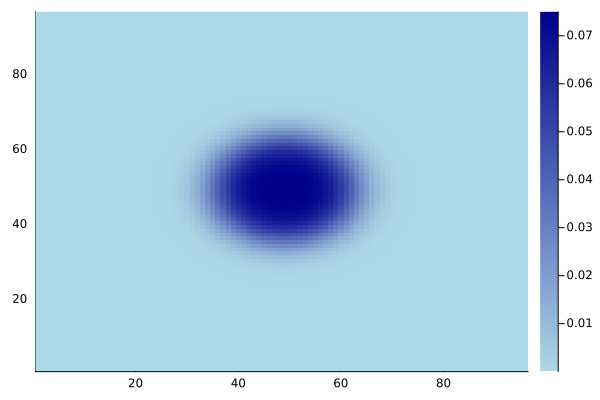

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 14
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2);

# Parameters
Ecut = 50
n_electrons = 1
β = 5;

# Collect all the terms, build and run the model
terms = [Kinetic(; scaling_factor=2),
         ExternalFromReal(X -> pot(X...)),
         Anyonic(1, β)
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-14)  # Reduce tol for production
E = scfres.energies.total
s = 2
E11 = π/2 * (2(s+1)/s)^((s+2)/s) * (s/(s+2))^(2(s+1)/s) * E^((s+2)/s) / β
println("e(1,1) / (2π)= ", E11 / (2π))
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)